In [1334]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
from IPython.display import display, HTML, IFrame
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')


In [1335]:
#folder = ['compsci-data','jbt-data', 'brands-data-400', 'brands-data-100']
folder = ['jbt-data']

In [1336]:


agg_list = []
full_list = []
test_list = []
for f in folder:
    agg =  pd.read_csv('{}/agg.csv'.format(f))
    agg['type'] = f.split('-')[0]
    agg.set_index('id')
    agg_list.append(agg)
   
    full = pd.read_csv('{}/full.csv'.format(f))
    full['type'] = f.split('-')[0]
    full.set_index('id')
    full_list.append( full)
    test = pd.read_csv('{}/test.csv'.format(f))
    test['type'] = f.split('-')[0]
    test.set_index('id')
    test_list.append (test)
aggregated = pd.concat(agg_list)
aggregated.to_csv('foo.csv')
full = pd.concat(full_list)
test_questions = pd.concat(test_list)
aggregated = aggregated[aggregated['_unit_state'] == 'finalized']


### Quality

In [1337]:
conf = aggregated[['id','text_readable', 'label:confidence', 'label']]
display(conf[['label:confidence']].describe())
print('Sentences 85%> confidence')
top_conf = conf[conf['label:confidence'] >= 0.85]
display(top_conf.count())
print('Sentences with a confidence between 0.60 and 0.85')
avg_conf = conf[(conf['label:confidence']< 0.85) & (conf['label:confidence']>= 0.60)]
display(avg_conf.count())
print('Sentence with <60% confidence')
worst_conf = conf[conf['label:confidence'] < 0.6]
display(worst_conf.count())

print('Useable sentences (conf >= 60%)')
useable = conf[conf['label:confidence'] >= 0.6]
display(useable.count())




def print_info(data):
    avg = pd.merge(data, full, suffixes=['_l', '_r'], on=['id'], how='left')[['id', 'text_readable_r', 'label:confidence', 'label_l', 'label_r', '_trust','a','b', 'type']].sort_values(['label:confidence', 'label_l' ,'id'])
    renamed_avg = avg.rename(columns={'label_l' : 'assigned', 'label_r' : 'proposed'})
    display( renamed_avg.style.background_gradient(cmap=plt.cm.get_cmap('RdYlGn'),subset=['label:confidence']))
    display(renamed_avg.describe())
    renamed_avg['counter'] = renamed_avg['proposed']
    avg = renamed_avg[['counter','assigned','proposed']].groupby([ 'assigned', 'proposed']).count()
   
    display(avg)


label:confidence
count        500.000000
mean           0.856185
std            0.184370
min            0.341200
25%            0.671600
50%            1.000000
75%            1.000000
max            1.000000

Sentences 85%> confidence


id                  300
text_readable       300
label:confidence    300
label               300
dtype: int64

Sentences with a confidence between 0.60 and 0.85


id                  180
text_readable       180
label:confidence    180
label               180
dtype: int64

Sentence with <60% confidence


id                  20
text_readable       20
label:confidence    20
label               20
dtype: int64

Useable sentences (conf >= 60%)


id                  480
text_readable       480
label:confidence    480
label               480
dtype: int64

**The hardest sentences**

In [1338]:
print_info(worst_conf)


label:confidence     _trust
count         66.000000  66.000000
mean           0.412705   0.854379
std            0.072775   0.068066
min            0.341200   0.727300
25%            0.356000   0.804550
50%            0.365050   0.848500
75%            0.498300   0.892900
max            0.524000   1.000000

counter
assigned proposed         
BETTER   BETTER          4
         OTHER           4
         WORSE           4
NONE     BETTER          4
         NONE            8
         OTHER           4
         WORSE           4
OTHER    BETTER          3
         NONE            9
         OTHER          11
         WORSE           4
WORSE    BETTER          2
         OTHER           2
         WORSE           3

**Average sentences**

In [1339]:
print_info(avg_conf)

label:confidence      _trust
count        544.000000  544.000000
mean           0.667361    0.869393
std            0.024967    0.067483
min            0.608100    0.714300
25%            0.651500    0.818200
50%            0.668500    0.871000
75%            0.682925    0.909100
max            0.771600    1.000000

counter
assigned proposed         
BETTER   BETTER         56
         NONE           16
         OTHER          10
         WORSE           2
NONE     BETTER         18
         NONE          205
         OTHER          76
         WORSE           7
OTHER    BETTER          3
         NONE           32
         OTHER          78
         WORSE           4
WORSE    BETTER          5
         NONE            5
         OTHER           2
         WORSE          25

**Easy sentences**

In [1340]:
print_info(top_conf)

label:confidence      _trust
count             907.0  907.000000
mean                1.0    0.867617
std                 0.0    0.070712
min                 1.0    0.714300
25%                 1.0    0.818200
50%                 1.0    0.871000
75%                 1.0    0.909100
max                 1.0    1.000000

counter
assigned proposed         
BETTER   BETTER        156
NONE     NONE          659
OTHER    OTHER          35
WORSE    WORSE          57

**All Sentences**

In [1341]:
print_info(conf)

label:confidence       _trust
count       1517.000000  1517.000000
mean           0.855163     0.867678
std            0.184879     0.069475
min            0.341200     0.714300
25%            0.671600     0.818200
50%            1.000000     0.871000
75%            1.000000     0.909100
max            1.000000     1.000000

counter
assigned proposed         
BETTER   BETTER        216
         NONE           16
         OTHER          14
         WORSE           6
NONE     BETTER         22
         NONE          872
         OTHER          80
         WORSE          11
OTHER    BETTER          6
         NONE           41
         OTHER         124
         WORSE           8
WORSE    BETTER          7
         NONE            5
         OTHER           4
         WORSE          85

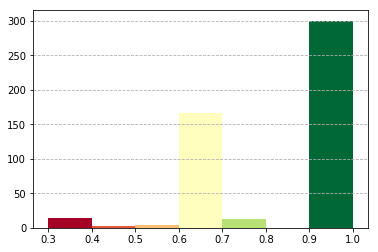

In [1342]:
color_map = plt.cm.get_cmap('RdYlGn')
#plt.title('Confidence of Labeling')
plt.grid(axis='y', linestyle='dashed')
ticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.xticks(ticks)
n, bins, patches = plt.hist(
    aggregated['label:confidence'], bins=ticks, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', color_map(c))
plt.show()

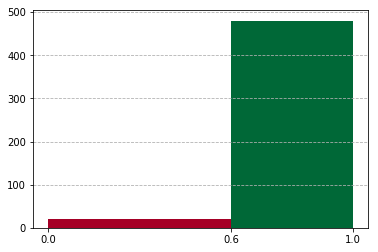

In [1343]:
color_map = plt.cm.get_cmap('RdYlGn')
#plt.title('Confidence of Labeling')
plt.grid(axis='y', linestyle='dashed')
ticks = [0.0,  0.6, 1]
plt.xticks(ticks)
n, bins, patches = plt.hist(
    aggregated['label:confidence'], bins=ticks, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', color_map(c))
plt.show()

## Results

**Label Distribution**

In [1344]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

def show_dist(labels):

    plt.figure(figsize=plt.figaspect(1))
    plt.pie(
        labels.value_counts().values,
        labels=labels.value_counts().keys().tolist(),
        radius=2,
        autopct=make_autopct(labels.value_counts().values))
    plt.show()


**All sentences**

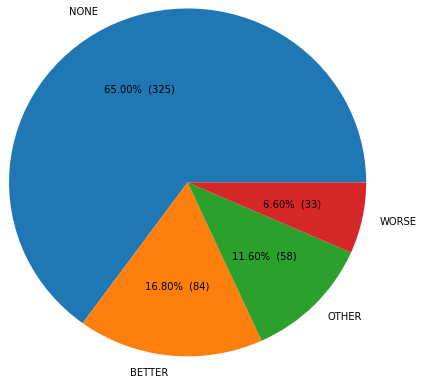

In [1345]:
show_dist(aggregated['label'])

**Sentences with conf > 60**

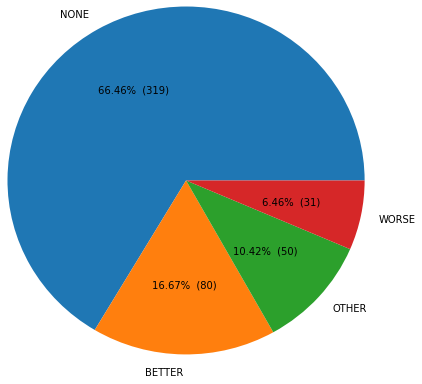

In [1346]:
show_dist(useable['label'])

## Test Sentences

In [1347]:
display(test_questions[['_pct_missed']].describe())

_pct_missed
count    51.000000
mean      0.239804
std       0.186649
min       0.000000
25%       0.120000
50%       0.190000
75%       0.335000
max       0.860000

In [1348]:
print("Amount of test-questions without failures:")
display(test_questions[test_questions['_pct_missed'] == 0]['_pct_missed'].count())

print("Amount of test questions missed 50%>")
display(test_questions[test_questions['_pct_missed'] >= 0.5]['_pct_missed'].count())

print("Amount of test questions missed 80%>")
display(test_questions[test_questions['_pct_missed'] >= 0.8]['_pct_missed'].count())

Amount of test-questions without failures:


4

Amount of test questions missed 50%>


4

Amount of test questions missed 80%>


1

In [1349]:
highly_missed = test_questions[test_questions['_pct_missed'] >= 0.6]
proj = highly_missed[['id', 'text_readable', '_pct_missed', '_judgments', 'label_gold', 'type' ]]
proj.sort_values(['_pct_missed','id'])#.style.background_gradient(cmap=plt.cm.get_cmap('RdYlGn_r'),subset=['_pct_missed'])

id                                      text_readable  \
4  N2239679026       So, is *google* Plus better than §facebook$?   
8  I1350818111  Is Netflix better than *hulu* Plus or §amazon$...   
0  P2533877672  The Jimmy Dean *sandwich* had far better §saus...   

   _pct_missed  _judgments label_gold type  
4         0.69          36       NONE  jbt  
8         0.71          38       NONE  jbt  
0         0.86          35      OTHER  jbt

**Contested Test-Questions**

In [1350]:
contested = test_questions[test_questions['_pct_contested'] != 0]
display(contested[['_pct_missed', '_judgments', '_pct_contested']].describe())

_pct_missed  _judgments  _pct_contested
count    13.000000   13.000000       13.000000
mean      0.291538   28.461538        0.040900
std       0.248959    4.483588        0.011971
min       0.000000   21.000000        0.027800
25%       0.120000   25.000000        0.032300
50%       0.190000   28.000000        0.038500
75%       0.370000   31.000000        0.041700
max       0.860000   36.000000        0.071400

In [1351]:
display(contested[['id', 'text_readable', '_pct_missed', '_pct_contested', '_judgments', 'label_gold','type' ]].sort_values([ '_pct_contested', '_pct_missed']))

id                                      text_readable  \
4   N2239679026       So, is *google* Plus better than §facebook$?   
40  S2969144027  Unfortunately the crimes get progressively wor...   
45  Q2671064448  The *restaurant* serves decent dinner and brea...   
3   L1806350316  *nixon* was better in the second, gerald ford ...   
47  O2379912802  That's the primary reason I traded my FWD Ford...   
49  P2496394204  The food was fine; my husband liked the *sausa...   
30   E575027004  Detra Denay Davis - better known by her middle...   
43   E697369047  Faster-paced sports, such as *basketball* and ...   
26  J1483527500  It wasn't very *cider*-like, but more like a s...   
7    E653701837  Enjoy stations such as *fox* 101, §espn$ 1380 ...   
37  S3049627063  We have a long, rich history of providing supe...   
0   P2533877672  The Jimmy Dean *sandwich* had far better §saus...   
2    F805035826  *georgia* TECH 56, §virginia$ 20 : The Cavalie...   

    _pct_missed  _pct_contested  _judgments   label_gold type  
4          0.69          0.0278          36         NONE  jbt  
40         0.09          0.0303          33  OTHER\nNONE  jbt  
45         0.19          0.0323          31  OTHER\nNONE  jbt  
3          0.23          0.0323          31       BETTER  jbt  
47         0.36          0.0357          28        WORSE  jbt  
49         0.37          0.0370          27         NONE  jbt  
30         0.19          0.0385          26         NONE  jbt  
43         0.00          0.0400          25  OTHER\nNONE  jbt  
26         0.12          0.0400          25  OTHER\nNONE  jbt  
7          0.12          0.0417          24         NONE  jbt  
37         0.14          0.0476          21         NONE  jbt  
0          0.86          0.0571          35        OTHER  jbt  
2          0.43          0.0714          28         NONE  jbt

In [1352]:
from orderedset import OrderedSet

aggregated['pair'] = aggregated.apply(lambda row: ', '.join(sorted([row['a'], row['b']])),axis=1)

In [1353]:
#display(aggregated[['pair', 'id']].groupby(['pair']).count())

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    #display(aggregated[['a','b', 'id']].groupby(['a','b']).count())
    
    f = np.append(aggregated['a'].values ,aggregated['b'].values)
    #print('Objects')
    #display(pd.value_counts(f, sort=True).to_frame())
    print('Pairs')
    display(pd.value_counts(aggregated['pair'].values,sort=True).to_frame().describe())
    display(pd.value_counts(aggregated['pair'].values,sort=True).to_frame())


Pairs


0
count  157.000000
mean     3.184713
std      1.768027
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      9.000000

0
amazon, hulu              9
california, michigan      9
basketball, football      8
carolina, missouri        7
sandwich, sausage         7
harvard, mit              7
tennis, volleyball        7
basketball, golf          6
carolina, georgia         6
carolina, michigan        6
california, missouri      6
aluminum, steel           6
soda, tea                 6
fishing, swimming         6
cnn, fox                  6
ps3, psp                  6
baseball, football        6
cafe, restaurant          6
baseball, softball        6
beer, tea                 5
mouse, rat                5
cider, juice              5
juice, milk               5
sandwich, steak           5
knife, pistol             5
dartmouth, harvard        5
gamecube, playstation     5
amazon, itunes            5
cement, concrete          5
golf, tennis              5
ds, wii                   5
california, pennsylvania  5
minivan, suv              5
michigan, virginia        4
cardboard, wood           4
georgia, oregon           4
aluminum, metal           4
concrete, metal           4
jeep, suv                 4
amazon, facebook          4
holiday, wedding          4
hockey, lacrosse          4
laptop, phone             4
facebook, youtube         4
bread, steak              4
beer, cider               4
california, virginia      4
harvard, stanford         4
football, lacrosse        4
pizza, soup               4
mobile, wallet            4
foam, wood                4
hulu, youtube             4
espn, fox                 4
camping, fishing          4
chocolate, soda           4
itunes, youtube           3
playstation, wii          3
concrete, timber          3
michigan, oregon          3
birthday, wedding         3
stone, timber             3
cement, wood              3
milk, soda                3
concrete, plastic         3
mit, stanford             3
chalk, paint              3
pizza, steak              3
california, carolina      3
pizza, sausage            3
ps2, ps3                  3
beer, juice               3
juice, soda               3
oregon, virginia          3
concrete, stone           3
pizza, sandwich           3
baseball, golf            3
georgia, missouri         3
gamecube, ps2             3
sandwich, soup            3
iphone, ipod              3
amazon, google            3
amazon, youtube           3
ds, psp                   3
baseball, tennis          3
chocolate, tea            3
golf, hockey              3
coffee, juice             3
rubber, wood              3
ipod, laptop              3
plastic, wood             3
juice, tea                3
metal, stone              3
pasta, pizza              2
beer, milk                2
georgia, michigan         2
forest, timber            2
facebook, google          2
ipod, phone               2
bread, potato             2
foam, rubber              2
plywood, steel            2
cornell, harvard          2
football, hockey          2
concrete, steel           2
football, volleyball      2
nixon, reagan             2
california, georgia       2
football, golf            2
ps3, wii                  2
bread, sausage            2
ds, ps3                   2
google, itunes            2
bread, pasta              2
basketball, tennis        2
google, youtube           2
lumber, timber            2
basketball, hockey        2
carolina, pennsylvania    2
football, tennis          2
bus, truck                2
motorcycle, truck         2
halloween, thanksgiving   2
kennedy, nixon            2
laptop, mobile            2
cement, rubber            2
beer, champagne           2
skiing, swimming          2
michigan, missouri        2
baseball, basketball      2
gamecube, wii             1
milk, tea                 1
pennsylvania, virginia    1
pasta, soup               1
hockey, tennis            1
psp, wii                  1
kennedy, reagan           1
lumber, plywood           1
steel, stone              1
beer, soda                1
baseball, hockey          1
concrete, rubber          1
iphone, laptop        

In [1354]:
print('--')

--
